## Project - 1 Supervised Learning

Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat

Data Description - http://www.stat.ufl.edu/~winner/data/airq402.txt

Assignment Expectations/Steps -

1. Import and store the data in a data frame. (2.5 points)
2. Remove the outliers from the data (5 points)
3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)
4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)
5. Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)
6. Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)
7. Print the coefficients & intercepts of the linear regression model (5 points)
8. Print the accuracy of the overall model (2.5 points)

In [297]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

# Preprocessing
from sklearn import preprocessing


# Train-test split and sickit linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Metrics and Accuracy store
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [298]:
# 1) Importing and storing the dataset
airq = pd.read_csv('airq402.txt', sep='\s+', header = None)
airq.columns = ['City1','City2','Avg_Fare1','Distance','Avg_Weekly_Psngrs','Mkt_Lead_AL','Mkt_Share1','Avg_Fare2','Low_Price_AL','Mkt_Share2','Price']
airq.head(10)

,City1,City2,Avg_Fare1,Distance,Avg_Weekly_Psngrs,Mkt_Lead_AL,Mkt_Share1,Avg_Fare2,Low_Price_AL,Mkt_Share2,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [265]:
airq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                1000 non-null object
City2                1000 non-null object
Avg_Fare1            1000 non-null float64
Distance             1000 non-null int64
Avg_Weekly_Psngrs    1000 non-null float64
Mkt_Lead_AL          1000 non-null object
Mkt_Share1           1000 non-null float64
Avg_Fare2            1000 non-null float64
Low_Price_AL         1000 non-null object
Mkt_Share2           1000 non-null float64
Price                1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [266]:
# In order to proceed further we will perform the below checks: 
# Check 1) To see if there are any null values in our dataset
airq.isnull().any()

City1                False
City2                False
Avg_Fare1            False
Distance             False
Avg_Weekly_Psngrs    False
Mkt_Lead_AL          False
Mkt_Share1           False
Avg_Fare2            False
Low_Price_AL         False
Mkt_Share2           False
Price                False
dtype: bool

In [267]:
# Since, there are no null values, we will poceed with next check
# Check 2) To check if there is any duplicacy in our dataset and drop if it exist
airq[airq.duplicated(subset=None, keep='first')]        

,City1,City2,Avg_Fare1,Distance,Avg_Weekly_Psngrs,Mkt_Lead_AL,Mkt_Share1,Avg_Fare2,Low_Price_AL,Mkt_Share2,Price


In [ ]:
# The above result shows there are no Duplicates in the dataset
# we can drop the duplicates as below in case they exist
# airq.drop_duplicates(inplace =True)

In [299]:
# Next, we need to convert the Categorical data-columns such as: City1, City2, Market Leading Airlines, Low Price Airlines
# We can convert them using Label Encoder

list(airq.select_dtypes(include ='object').columns)

['City1', 'City2', 'Mkt_Lead_AL', 'Low_Price_AL']

In [300]:
# Converting first categorical column City1
lb_make = preprocessing.LabelEncoder()
lb_make.fit(airq['City1'].unique())
airq['City1'] = lb_make.transform(airq['City1'])
airq['City1'] = airq['City1'].astype('category')
airq.head(5)

,City1,City2,Avg_Fare1,Distance,Avg_Weekly_Psngrs,Mkt_Lead_AL,Mkt_Share1,Avg_Fare2,Low_Price_AL,Mkt_Share2,Price
0,16,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,16,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,2,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,2,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,2,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [301]:
# Converting rest of the 3 columns City2, Market Leading Airlines & Low Price Airlines

lb_make.fit(airq['City2'].unique())
airq['City2'] = lb_make.transform(airq['City2'])
airq['City2'] = airq['City2'].astype('category')

lb_make.fit(airq['Mkt_Lead_AL'].unique())
airq['Mkt_Lead_AL'] = lb_make.transform(airq['Mkt_Lead_AL'])
airq['Mkt_Lead_AL'] = airq['Mkt_Lead_AL'].astype('category')

lb_make.fit(airq['Low_Price_AL'].unique())
airq['Low_Price_AL'] = lb_make.transform(airq['Low_Price_AL'])
airq['Low_Price_AL'] = airq['Low_Price_AL'].astype('category')

airq.head(10)

,City1,City2,Avg_Fare1,Distance,Avg_Weekly_Psngrs,Mkt_Lead_AL,Mkt_Share1,Avg_Fare2,Low_Price_AL,Mkt_Share2,Price
0,16,0,114.47,528,424.56,6,70.19,111.03,8,70.19,111.03
1,16,40,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,2,0,214.42,852,215.76,4,78.89,223.98,5,2.77,167.12
3,2,7,69.40,288,606.84,14,96.97,68.86,17,96.97,68.86
4,2,52,158.13,723,313.04,12,39.79,161.36,17,15.34,145.42
5,2,18,135.17,1204,199.02,14,40.68,137.97,6,17.09,127.69
6,2,32,152.85,2237,237.17,14,59.94,148.59,17,59.94,148.59
7,2,33,190.73,2467,191.95,4,17.89,205.06,16,16.59,174.00
8,2,40,129.35,1073,550.54,14,76.84,127.69,17,76.84,127.69
9,2,82,134.17,1130,202.93,13,35.40,132.91,6,26.40,124.78


In [302]:
# Object columns transformed into 'Category' 
airq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                1000 non-null category
City2                1000 non-null category
Avg_Fare1            1000 non-null float64
Distance             1000 non-null int64
Avg_Weekly_Psngrs    1000 non-null float64
Mkt_Lead_AL          1000 non-null category
Mkt_Share1           1000 non-null float64
Avg_Fare2            1000 non-null float64
Low_Price_AL         1000 non-null category
Mkt_Share2           1000 non-null float64
Price                1000 non-null float64
dtypes: category(4), float64(6), int64(1)
memory usage: 66.6 KB


In [7]:
# 2) Remove the outliers from the data (5 points)
# Outliers can be detected using: 1. Mean - Std Devn Method and 2. IQR interquartile range

In [167]:
#col_name = airq.select_dtypes(include =['float64', 'int64']).columns
#ol_name
#np.mean(airq[col_name])

Avg_Fare1             163.37542
Distance             1056.97300
Avg_Weekly_Psngrs     672.27914
Mkt_Share1             60.12859
Avg_Fare2             166.64756
Mkt_Share2             34.55148
Price                 143.19309
dtype: float64

In [307]:
# 1) Removing outliers using the Mean - STD method
def outlier_mean(df):
    mylist = list(df.select_dtypes(include =['float64', 'int64']).columns)
    outlier1 = pd.DataFrame()
    outlier2 = pd.DataFrame()
    for i in mylist:
        outlier2 = pd.concat([outlier2, outlier1.append(df[df[i] > df[i].mean()+3*df[i].std()])])
        outlier2 = pd.concat([outlier2, outlier1.append(df[df[i] < df[i].mean()-3*df[i].std()])])
    outlier2.drop_duplicates(inplace =True)    
    return outlier2

In [308]:
# outlier using Mean - STD method
out2 = outlier_mean(airq)
out2.info()

# Mean method of finding outlier returns total 34 records.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 213 to 774
Data columns (total 11 columns):
City1                34 non-null category
City2                34 non-null category
Avg_Fare1            34 non-null float64
Distance             34 non-null int64
Avg_Weekly_Psngrs    34 non-null float64
Mkt_Lead_AL          34 non-null category
Mkt_Share1           34 non-null float64
Avg_Fare2            34 non-null float64
Low_Price_AL         34 non-null category
Mkt_Share2           34 non-null float64
Price                34 non-null float64
dtypes: category(4), float64(6), int64(1)
memory usage: 10.1 KB


In [309]:
# Removing the outliers using mean method
airq_f2= pd.concat([airq,out2]).drop_duplicates(keep=False)
airq_f2.head()

,City1,City2,Avg_Fare1,Distance,Avg_Weekly_Psngrs,Mkt_Lead_AL,Mkt_Share1,Avg_Fare2,Low_Price_AL,Mkt_Share2,Price
0,16,0,114.47,528,424.56,6,70.19,111.03,8,70.19,111.03
1,16,40,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,2,0,214.42,852,215.76,4,78.89,223.98,5,2.77,167.12
3,2,7,69.40,288,606.84,14,96.97,68.86,17,96.97,68.86
4,2,52,158.13,723,313.04,12,39.79,161.36,17,15.34,145.42


In [310]:
# Removing outliers using the IQR method
# We know that: 
# Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
# defining a function to: accept a dataframe, remove outliers, return cleaned data in a new dataframe
def remove_outlier(df_in):
    col_name = list(df_in.select_dtypes(include =['float64', 'int64']).columns) # picking only numeric columns
    df_out1 = pd.DataFrame()
    df_out2 = pd.DataFrame()
    for i in col_name:
        q1,q3 = np.percentile(df_in[i],[25,75])
        #q1 = df_in[i].quantile(0.25)
        #q3 = df_in[i].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-(1.5*iqr)
        fence_high = q3+(1.5*iqr)
        df_out2 = pd.concat([df_out2, df_out1.append(df_in[df_in[i] < fence_low])])
        df_out2 = pd.concat([df_out2, df_out1.append(df_in[df_in[i] > fence_high])])
    df_out2.drop_duplicates(inplace =True)
    return df_out2

In [311]:
out1 = remove_outlier(airq)
out1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 197 to 972
Data columns (total 11 columns):
City1                115 non-null category
City2                115 non-null category
Avg_Fare1            115 non-null float64
Distance             115 non-null int64
Avg_Weekly_Psngrs    115 non-null float64
Mkt_Lead_AL          115 non-null category
Mkt_Share1           115 non-null float64
Avg_Fare2            115 non-null float64
Low_Price_AL         115 non-null category
Mkt_Share2           115 non-null float64
Price                115 non-null float64
dtypes: category(4), float64(6), int64(1)
memory usage: 15.5 KB


In [ ]:
# the above method shows there are 115 outliers

In [312]:
# Removing the outliers using IQR method
airq_f1= pd.concat([airq,out1]).drop_duplicates(keep=False)
airq_f1.head()

,City1,City2,Avg_Fare1,Distance,Avg_Weekly_Psngrs,Mkt_Lead_AL,Mkt_Share1,Avg_Fare2,Low_Price_AL,Mkt_Share2,Price
0,16,0,114.47,528,424.56,6,70.19,111.03,8,70.19,111.03
1,16,40,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,2,0,214.42,852,215.76,4,78.89,223.98,5,2.77,167.12
3,2,7,69.40,288,606.84,14,96.97,68.86,17,96.97,68.86
4,2,52,158.13,723,313.04,12,39.79,161.36,17,15.34,145.42


In [70]:
# Mean - STD method gives 34 outlier records while IQR method gives 115 records
# There is a considerably large difference between these 2
# We will accept the result of the Mean - STD  method as we will have to drop only a few records and...
# ... train and test our model based on that one

In [314]:
# 3) Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)
# Proceeding with the airq_f2 dataset which was formed after removing outliers by the Mean-STD method
# X - Independent Variables and y - Dependent Variable
X = airq_f2.drop('Avg_Fare1', axis =1)
y = airq_f2['Avg_Fare1']
print(list(X.columns))

['City1', 'City2', 'Distance', 'Avg_Weekly_Psngrs', 'Mkt_Lead_AL', 'Mkt_Share1', 'Avg_Fare2', 'Low_Price_AL', 'Mkt_Share2', 'Price']


In [315]:
# 4) Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)
# finding correlation between all the independent variables(X) and the dependent variable(y)

corr1 = y.corr(X['City1'])
corr1

-0.09508344254165668

In [316]:
# similarly we can find for rest of the independent variables
# Creating a function to calculate the correlation for all the independent variables and dependent variable

def corr(df_ind, df_dpn):
    corr_all = {}
    for a in df_ind.columns:
        corr_all[a]= df_dpn.corr(df_ind[a])
    return corr_all

In [317]:
correlation = corr(X,y)
correlation

{'City1': -0.09508344254165668,
 'City2': -0.04344331281701689,
 'Distance': 0.552014612948072,
 'Avg_Weekly_Psngrs': -0.22212099347507486,
 'Mkt_Lead_AL': -0.3350882707174751,
 'Mkt_Share1': -0.2281293244606543,
 'Avg_Fare2': 0.9811032910471464,
 'Low_Price_AL': -0.17122633999254017,
 'Mkt_Share2': -0.4760232292317101,
 'Price': 0.8593621264938928}

In [318]:
# Deleting values from the Independent variables dataset 'X' with less than 0.1 correlation 
for i in X.columns:
    if correlation[i]<0.1:
        print("Independent Columns being deleted are: %s" %(i))
        X.drop(i, axis =1, inplace =True)

Independent Columns being deleted are: City1
Independent Columns being deleted are: City2
Independent Columns being deleted are: Avg_Weekly_Psngrs
Independent Columns being deleted are: Mkt_Lead_AL
Independent Columns being deleted are: Mkt_Share1
Independent Columns being deleted are: Low_Price_AL
Independent Columns being deleted are: Mkt_Share2


In [319]:
# List of final Independent Columns remaining:
X.columns

Index(['Distance', 'Avg_Fare2', 'Price'], dtype='object')

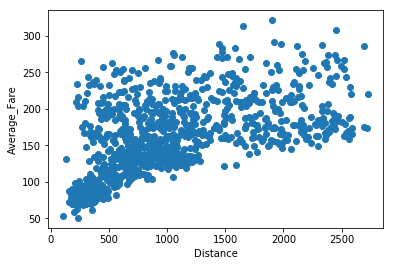

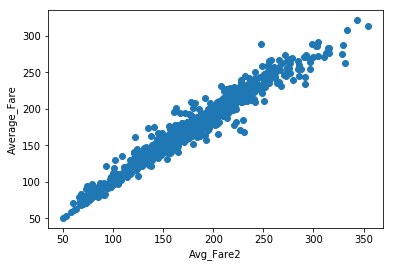

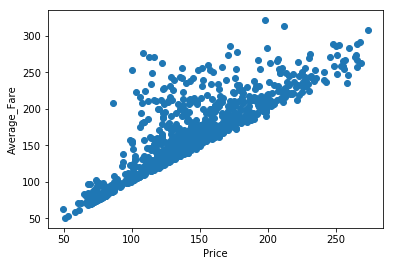

In [320]:
# 5) Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

for i in X:
    plt.scatter(X[i],y)
    plt.xlabel(i)
    plt.ylabel('Average_Fare')
    plt.show()

In [321]:
# We can observe that the Average Fare(ind var) has a strong corelation with the Avg fare2 and Price variables...
# ...but not with the distance variable on the other hand
# The same can also be verified from the correlation function we have defined above (ln[202]) 


In [322]:
# 6) Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 5)
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [323]:
# 7) Print the coefficients & intercepts of the linear regression model (5 points)

print((model.coef_))
print('Model Intercept is: %f '%(model.intercept_))

[0.00158171 0.75829782 0.19990565]
Model Intercept is: 7.194195 


In [324]:
# Calculating the y prediction

ypred = model.predict(xtest)
ypred

array([109.62945674,  99.99735556, 119.78523213,  78.28011828,
       124.09564015, 215.42442877, 221.41280232,  87.05331139,
       150.56935864, 276.06762332,  73.63161694, 158.46586121,
       295.04513674, 162.02775036, 124.80612611, 157.47662244,
       204.04986847, 148.90199247, 222.09939465, 184.53618194,
       156.05161652, 205.1220541 ,  75.18493745, 160.58140305,
       179.04040381, 259.86958073, 203.44332726, 190.8420642 ,
       123.10982409, 148.10105911,  63.20615849, 174.97441723,
       179.84005866, 107.92619174, 216.30831414, 206.72765716,
       183.42164976, 198.51046202,  76.22779753, 108.78397125,
        89.98053817, 205.78366006,  90.63297525,  82.48951953,
       183.81236692,  91.16800082, 253.88055   , 218.06034551,
       266.9905913 , 178.96358947, 174.00985239, 169.61663595,
       114.44961351, 124.67614538, 318.38005336, 161.32324889,
       169.272989  , 264.07601992, 108.95796733, 126.7536258 ,
       123.39377802, 109.03404323, 156.24168193, 124.68

In [215]:
# Comparing the Predicted and Actual accuracy
# cmprn_pred = pd.DataFrame({'Predicted': ypred, 'Actual': ytest})
# cmprn_pred.head(25)

,Predicted,Actual
860,109.629457,108.46
806,99.997356,99.10
813,119.785232,116.01
644,78.280118,75.47
33,124.095640,117.85
761,215.424429,220.24
787,221.412802,221.07
977,87.053311,82.34
438,150.569359,151.25
214,276.067623,286.14


In [325]:
# 8) Print the accuracy of the overall model (2.5 points)

# Metrics and Accuracy store
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = sqrt(mse)
r2score = r2_score(ytest, ypred)
print('Mean Absolute Error is: %f, '%(mae))
print('Mean Squared Error is: %f, '%(mse))
print('Root Mean Squared Error is: %f, '%(rmse))
print('Model Score is: %f '%(r2score))

Mean Absolute Error is: 6.202327, 
Mean Squared Error is: 79.806693, 
Root Mean Squared Error is: 8.933459, 
Model Score is: 0.970532 
